In [1]:
%load_ext autoreload
%autoreload 2

In [43]:
from masterthesis.held_out_eval import get_input_reps, get_predictions, load_model_and_w2i
from masterthesis.utils import CEFR_LABELS, IMG_DIR, load_split, MODEL_DIR, rescale_regression_results

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(context="paper", style="whitegrid")

In [5]:
model_path = MODEL_DIR / "rnn-26805083_1_model.h5"

In [29]:
data = load_split("norsk", round_cefr=False)
labels = CEFR_LABELS
highest_class = 6
print(len(data))
data.head()

200


,age,cefr,filename,gender,lang,num_tokens,split,testlevel,title,topic
736,66,NaN,h2001,NaN,bokmål,257,NaN,Høyere nivå,Diktet 'Ingen ting' av Paulus Utsi om språk,litteratur dikt språk
737,35,NaN,h2002,mann,bokmål,327,NaN,Høyere nivå,Diktet 'Ingen ting' av Paulus Utsi om språk,litteratur dikt språk
738,36,NaN,h2003,kvinne,bokmål,945,NaN,Høyere nivå,Organdonasjon,helse organ
739,38,NaN,h2004,kvinne,nynorsk,677,NaN,Høyere nivå,Organdonasjon,helse organ
740,36,NaN,h2005,kvinne,bokmål,511,NaN,Høyere nivå,Olympiske leker og sportslige idealer,idrett/sport


In [17]:
model, w2i = load_model_and_w2i(model_path)

In [30]:
multi_input = isinstance(model.input, list) and len(model.input) == 2
multi_output = isinstance(model.outputs, list) and len(model.outputs) > 1

x = get_input_reps(w2i, multi_input, split="norsk")
predictions = get_predictions(model, x, multi_output)

100%|██████████| 200/200 [00:00<00:00, 1284.65it/s]

Preprocessing split 'norsk' ...


In [41]:
# Round to integers and clip to score range
pred = rescale_regression_results(predictions, highest_class).ravel()
data["pred"] = pred
data["Predicted label"] = data.pred.apply(CEFR_LABELS.__getitem__)
data.head()

,age,cefr,filename,gender,lang,num_tokens,split,testlevel,title,topic,pred,pred_label,Predicted label
736,66,NaN,h2001,NaN,bokmål,257,NaN,Høyere nivå,Diktet 'Ingen ting' av Paulus Utsi om språk,litteratur dikt språk,2,B1,B1
737,35,NaN,h2002,mann,bokmål,327,NaN,Høyere nivå,Diktet 'Ingen ting' av Paulus Utsi om språk,litteratur dikt språk,3,B1/B2,B1/B2
738,36,NaN,h2003,kvinne,bokmål,945,NaN,Høyere nivå,Organdonasjon,helse organ,5,B2/C1,B2/C1
739,38,NaN,h2004,kvinne,nynorsk,677,NaN,Høyere nivå,Organdonasjon,helse organ,4,B2,B2
740,36,NaN,h2005,kvinne,bokmål,511,NaN,Høyere nivå,Olympiske leker og sportslige idealer,idrett/sport,4,B2,B2


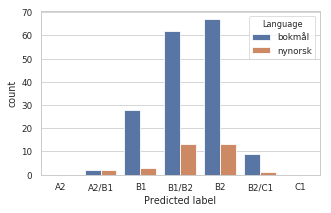

In [44]:
data_ = data.rename({"lang": "Language"}, axis="columns")
sns.countplot(x="Predicted label", hue="Language", data=data_, order=CEFR_LABELS)
plt.gcf().set_size_inches(5, 3)
plt.savefig(str(IMG_DIR / "native-predictions.pdf"), bbox_inches='tight')
plt.show()